## Problem 1

### i) Newton's Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
def my_func_1(x):
    return x + np.exp(-np.square(x))*np.cos(x)

def my_func_2(x):
    return np.square(my_func_1(x))


def der_my_func_1(x):
    return 1 - np.exp(-np.square(x))*(np.sin(x) + 2*x*np.cos(x))

def der_my_func_2(x):
    return 2*my_func_1(x)*der_my_func_1(x)


def double_der_my_func_1(x):
    return 2 * np.exp(-np.square(x)) * (np.cos(x) * (2*np.square(x) - 1) + np.sin(x)*(x+1))

def double_der_my_func_2(x):
    return 2 * (my_func_1(x) * double_der_my_func_1(x) + np.square(der_my_func_1(x)))

In [3]:
def Newton(func=my_func_1, der_func=der_my_func_1, p_0 = 0, tol = 1e-6, max_iter=1000):
    """returns (p_n, no. of iterations, approximations)"""
    p_n = p_0; i = 0; approximations = [p_n]
    while(i < max_iter):
        derivative = der_func(p_n)
        if abs(derivative) < np.finfo(float).eps:
            print("Derivative vanished. Stopping iteration")
            return (p_n, i, approximations)
        i += 1
        
        p_nplus1 = p_n - func(p_n)/derivative
        approximations.append(p_nplus1)
        if abs(p_nplus1 - p_n) < tol:
            break
        p_n = p_nplus1
        
    return (p_nplus1, i, approximations)

#### a) $f(x) = x + e^{-x^2}cos(x)$

In [4]:
(p_n, iterations, approximations) = Newton()
print("p_n = ", p_n)
print("iterations = ", iterations)
#print("approximations = ", approximations)

p_n =  -0.5884017765009963
iterations =  5


In [5]:
errors = [abs(my_func_1(i)) for i in approximations]

e_nplus1 = errors[1:]
e_n = errors[:-1]

x = np.log(e_n)
y = np.log(e_nplus1);

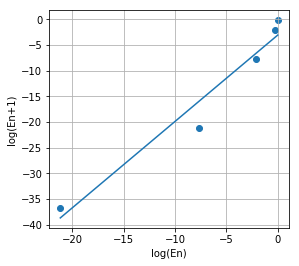

In [6]:
fig,ax = plt.subplots()
plt.xlabel('log(En)')
plt.ylabel('log(En+1)')
ax.scatter(x,y)
ax.plot(x, np.poly1d(np.polyfit(x,y,1))(x))
ax.grid(True)
ax.set_aspect(0.5) # = 1/2.0 since 2.0 is the convergence rate of Newton's method

##### So we're getting a curve which can be best fit with a straight line of slope nearly 2 (as expected since Newton's converges quadratically).
##### Root found = -0.5884017765009963
##### No. of iterations taken = 5

###### Let's also use the function value of our approximation (its difference from 0) as our error metric (since we don't know the exact value of the root)


In [7]:
print("absolute error = ", abs(my_func_1(p_n)))

absolute error =  1.1102230246251565e-16


#### b) $f(x) = (x + e^{-x^2}cos(x))^2$

In [8]:
(p_n, iterations, approximations) = Newton(func=my_func_2, der_func=der_my_func_2)

In [9]:
print("p_n = ", p_n)
print("iterations = ", iterations)
#print("approximations = ", approximations)

p_n =  -0.5884011102599648
iterations =  18


In [10]:
errors = [abs(my_func_1(i)) for i in approximations]

In [11]:
e_nplus1 = errors[1:]
e_n = errors[:-1]

x = np.log(e_n)
y = np.log(e_nplus1);

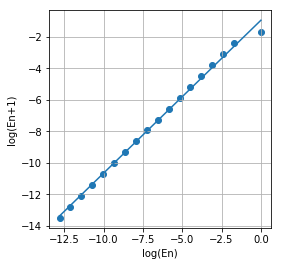

In [12]:
fig,ax = plt.subplots()
plt.xlabel('log(En)')
plt.ylabel('log(En+1)')
ax.scatter(x,y)
ax.plot(x, np.poly1d(np.polyfit(x,y,1))(x))
ax.grid(True)
ax.set_aspect(1) # = 1/1.0

##### So we're getting a straight line of slope nearly 1 (as expected since Newton's converges linearly when the derivative at the root is 0).
##### Root found = -0.5884011102599648
##### No. of iterations taken = 18

In [13]:
print("absolute error = ", abs(my_func_2(p_n)))

absolute error =  1.929708636477569e-12


### ii) Secant Method

In [14]:
def Secant(func=my_func_1, p_0 = 0, p_1 = 1, tol = 1e-6, max_iter=1000):
    """returns (p_n, no. of iterations, approximations)"""
    p_n = p_1; p_nminus1 = p_0; i = 0; approximations = [p_nminus1, p_n]
    while(i < max_iter):
        derivative = (func(p_n) - func(p_nminus1))/(p_n - p_nminus1)
        if abs(derivative) < np.finfo(float).eps:
            print("Derivative vanished. Stopping iteration")
            return (p_n, i, approximations)
        i += 1
        
        p_nplus1 = p_n - func(p_n)/derivative
        approximations.append(p_nplus1)
        if abs(p_nplus1 - p_n) < tol:
            break
        p_nminus1 = p_n
        p_n = p_nplus1
        
        
    return (p_nplus1, i, approximations)

In [15]:
(p_n, iterations, approximations) = Secant()
print("p_n = ", p_n)
print("iterations = ", iterations)
#print("approximations = ", approximations)

p_n =  -0.5884017765009013
iterations =  7


In [16]:
errors = [abs(my_func_1(i)) for i in approximations]

e_nplus1 = errors[1:]
e_n = errors[:-1]

x = np.log(e_n)
y = np.log(e_nplus1);

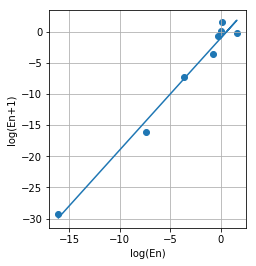

In [17]:
fig,ax = plt.subplots()
plt.xlabel('log(En)')
plt.ylabel('log(En+1)')
ax.scatter(x,y)
ax.plot(x, np.poly1d(np.polyfit(x,y,1))(x))
ax.grid(True)
ax.set_aspect(0.617) # = 1/1.62

##### So we're getting an almost straight line of slope nearly 1.62 (as expected since Secant's has that convergence rate).
##### Root found = -0.5884017765009013
##### No. of iterations taken = 7

In [18]:
print("absolute error = ", abs(my_func_1(p_n)))

absolute error =  1.9806378759312793e-13


#### b) $f(x) = (x + e^{-x^2}cos(x))^2$

In [19]:
(p_n, iterations, approximations) = Secant(func=my_func_2)
print("p_n = ", p_n)
print("iterations = ", iterations)
#print("approximations = ", approximations)

p_n =  -0.5884006785832132
iterations =  33


In [20]:
errors = [abs(my_func_1(i)) for i in approximations]

In [21]:
e_nplus1 = errors[1:]
e_n = errors[:-1]

x = np.log(e_n)
y = np.log(e_nplus1);

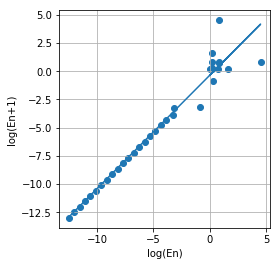

In [22]:
fig,ax = plt.subplots()
plt.xlabel('log(En)')
plt.ylabel('log(En+1)')
ax.scatter(x,y)
ax.plot(x, np.poly1d(np.polyfit(x,y,1))(x))
ax.grid(True)
ax.set_aspect(1) # = 1/1.0

##### So we're getting an almost straight line of slope nearly 1 (as expected since Secant's has that convergence rate when the multiplicity is 2).
##### Root found = -0.5884006785832132
##### No. of iterations taken = 33

In [23]:
print("absolute error = ", abs(my_func_2(p_n)))

absolute error =  5.240450526912252e-12


### iii) Modified Newton's Method

In [24]:
def numerator_term_func_1(x):
    return my_func_1(x)*der_my_func_1(x) 
    
def denominator_term_func_1(x):
    return np.square(der_my_func_1(x)) - my_func_1(x)*double_der_my_func_1(x)

def numerator_term_func_2(x):
    return my_func_2(x)*der_my_func_2(x)

def denominator_term_func_2(x):
    return np.square(der_my_func_2(x)) - my_func_2(x)*double_der_my_func_2(x)


In [25]:
def ModNewton(numerator_term=numerator_term_func_1, denominator_term = denominator_term_func_1,
              p_0 = 0, tol = 1e-6, max_iter=1000):
    """returns (p_n, no. of iterations, approximations)"""
    p_n = p_0; i = 0; approximations = [p_n]
    while(i < max_iter):
        derivative = denominator_term(p_n)
        if abs(derivative) < np.finfo(float).eps:
            printf("Derivative vanished. Stopping iteration")
            return (p_n, i, approximations)
        i += 1
        
        p_nplus1 = p_n - numerator_term(p_n)/derivative
        approximations.append(p_nplus1)
        if abs(p_nplus1 - p_n) < tol:
            break
        p_n = p_nplus1
        
    return (p_nplus1, i, approximations)

#### a) $f(x) = x + e^{-x^2}cos(x)$

In [26]:
(p_n, iterations, approximations) = ModNewton()
print("p_n = ", p_n)
print("iterations = ", iterations)
#print("approximations = ", approximations)

p_n =  -0.5884017765009951
iterations =  5


In [27]:
errors = [abs(my_func_1(i)) for i in approximations]

e_nplus1 = errors[1:]
e_n = errors[:-1]

x = np.log(e_n)
y = np.log(e_nplus1);

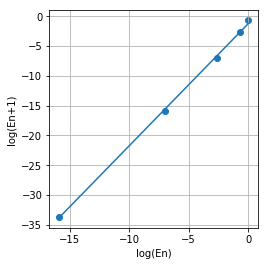

In [28]:
fig,ax = plt.subplots()
plt.xlabel('log(En)')
plt.ylabel('log(En+1)')
ax.scatter(x,y)
ax.plot(x, np.poly1d(np.polyfit(x,y,1))(x))
ax.grid(True)
ax.set_aspect(0.5) # = 1/2.0

##### Straight line with slope 2, as expected (Modified Newton's convergence rate)
##### Root found = -0.5884017765009951
##### No. of iterations taken = 5

In [29]:
print("absolute error = ", abs(my_func_1(p_n)))

absolute error =  2.4424906541753444e-15


#### b) $f(x) = (x + e^{-x^2}cos(x))^2$

In [30]:
(p_n, iterations, approximations) = ModNewton(numerator_term=numerator_term_func_2,
                                              denominator_term = denominator_term_func_2)
print("p_n = ", p_n)
print("iterations = ", iterations)
#print("approximations = ", approximations)

p_n =  -0.5884017765009951
iterations =  5


In [31]:
errors = [abs(my_func_1(i)) for i in approximations]

e_nplus1 = errors[1:]
e_n = errors[:-1]

x = np.log(e_n)
y = np.log(e_nplus1);

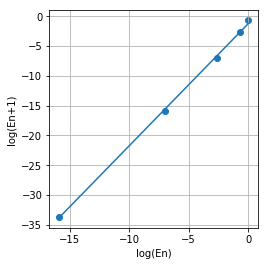

In [32]:
fig,ax = plt.subplots()
plt.xlabel('log(En)')
plt.ylabel('log(En+1)')
ax.scatter(x,y)
ax.plot(x, np.poly1d(np.polyfit(x,y,1))(x))
ax.grid(True)
ax.set_aspect(0.5) # = 1/2.0

##### Straight line with slope 2, as expected (Modified Newton's convergence rate even when multpicity is 2)
##### Root found = -0.5884017765009951
##### No. of iterations taken = 5
##### (We actually get the exact same equations (numerator and denominator terms) and hence the same answer for both problems when using Modified Newton's)

In [33]:
print("absolute error = ", abs(my_func_2(p_n)))

absolute error =  5.965760595733902e-30


## Problem 2

$$g(x) = x - \phi(x)f(x) - \psi(x)f^2(x)$$

For cubic convergence, g'(p) = g"(p) = 0.

So, differentiating,

\begin{equation*}
g'(x) = 1 - (\phi'(x)f(x) + \phi(x)f'(x)) - (\psi'(x)f^2(x) + 2\psi(x)f(x)f'(x))\\
\end{equation*}

Since p is a root, g(p) = p and f(p) = 0.

Putting x = p gives:

\begin{align*}
0 = 1 - \phi(p)f'(p) \\
\phi(p) = \frac{1}{f'(p)} \\
\end{align*}

i.e.,

$$\phi(x) = \frac{1}{f'(x)}$$

$\therefore$

$$\phi'(x) = \frac{-f''(x)}{f'(x)^2}$$

We'll simplify it for ease to

$$\phi' = \frac{-f''}{f'^2}$$

So, we can write g'(x) as:

\begin{align*}
g' &= 1 - (\phi'f + \phi f') - (\psi'f^2 + 2\psi ff') \\
&= 1 - (\dfrac{-ff''}{f'^2} + 1) - (\psi'f^2 + 2\psi ff') \\
&= \dfrac{ff''}{f'^2} - (\psi'f^2 + 2\psi ff') \\
\end{align*}

Differentiating once more, we get:

\begin{align*}
g'' &= \dfrac{ff'f''' + f'^2f'' - 2ff''^2}{f'^3} - (f^2\psi'' + 4ff'\psi' + 2ff''\psi + 2f'^2\psi)
\end{align*}

Now, putting x = p gives:

\begin{align*}
g''(p) &= 0 = \dfrac{f''}{f'} - 2f'^2\psi \\
\psi &= \dfrac{f''}{2f'^3}
\end{align*}

Therefore,

$$\phi(x) = \frac{1}{f'(x)}$$

and

$$\psi(x) = \dfrac{f''(x)}{2f'(x)^3}$$

Hence,

$$g(x) = x - \dfrac{f(x)}{f'(x)} - \dfrac{f''(x)f^2(x)}{2f'(x)^3}$$

Now, since the convergence is cubic, its rate is given by:

\begin{align*}
\epsilon_{n+1} = \frac{g'''(p)}{3!} \epsilon_n^3 \\
\frac{\epsilon_{n+1}}{\epsilon_n^3} = \frac{g'''(p)}{6} \\
\end{align*}


Using Wolfram Alpha, we can calculate the triple derivative of g(x)

https://www.wolframalpha.com/input/?i=derivative+of+%28double+derivative+of+x+-+f%5Cf%27+-+%28f%27%27+f%5E2%29%2F%282f%27%5E3%29%29

But the expression is too complicated, even after simplifying it by putting x = p in it.

So, going by the method used on https://en.wikipedia.org/wiki/Halley%27s_method#Cubic_convergence ,
we can write

\begin{align*}
\frac{\epsilon_{n+1}}{\epsilon_n^3} = \frac{2f'(p)f'''(p) - 3f''(p)^2}{12f'(p)^2} \\
\end{align*}


Therefore,

$$\alpha = 3$$
and
$$\lambda = \frac{2f'(p)f'''(p) - 3f''(p)^2}{12f'(p)^2}$$

## Problem 3

In [34]:
theta2_0 = 30*np.pi/180;
theta3_0 = 0;
theta4 = 220 * np.pi/180

r1 = 10; r2 = 6; r3 = 8; r4 = 4;

theta2_n = theta2_0;
theta3_n = theta3_0;

Theta = np.array([
    [theta2_n], [theta3_n]
], np.float64);

In [35]:
def Function(Theta):
    return np.array([
        [r2*np.cos(Theta[0][0]) + r3*np.cos(Theta[1][0]) + r4*np.cos(theta4) - r1],
        [r2*np.sin(Theta[0][0]) + r3*np.sin(Theta[1][0]) + r4*np.sin(theta4)]
    ])

In [36]:
def Jacobian(Theta):
    return np.array([
        [-r2*np.sin(Theta[0][0]), -r3*np.sin(Theta[1][0])],
        [r2*np.cos(Theta[0][0]), r3*np.cos(Theta[1][0])]
    ])

In [37]:
def determinant(matrix):
    return matrix[0][0]*matrix[1][1] - matrix[0][1]*matrix[1][0]

In [38]:
def inverse(matrix):
    return np.array([
        [matrix[1][1], -matrix[0][1]],
        [-matrix[1][0], matrix[0][0]]
    ])/determinant(matrix)

##### I am defining error as the max of errors (|$\theta_2^{n+1} - \theta_2^n$| , |$\theta_3^{n+1} - \theta_3^n$|)

In [39]:
def CoupledNewton(Theta_n=Theta, tol = 1e-4, max_iter=1000):
    """returns (p_n, no. of iterations, approximations)"""
    i = 0; approximations = [Theta_n]
    while(i < max_iter):
        Jac = Jacobian(Theta_n)
        if abs(determinant(Jac)) < np.finfo(float).eps:
            print("Derivative (Jacobian) vanished. Stopping iteration")
            return (Theta_n, i, approximations)
        i += 1
        Theta_nplus1 = Theta_n - np.matmul(inverse(Jac), Function(Theta_n))
        approximations.append(Theta_nplus1)
        if max(abs(Theta_nplus1 - Theta_n)) < tol:
            break
        Theta_n = Theta_nplus1
        
    return (Theta_nplus1, i, approximations)

In [40]:
(Theta, iterations, approximations) = CoupledNewton()

In [41]:
print("theta2 = ", Theta[0][0] * 180/ np.pi)
print("theta3 = ", Theta[1][0] * 180/ np.pi)
#print("approximations = ", approximations)

theta2 =  32.01518099634485
theta3 =  -4.3709878918079985


##### So, the angles in degrees are (after doing the calculations with all degrees in radians):
##### $\theta_2$ = 32.015
##### $\theta_3$ = -4.37 = 355.63
##### No. of iterations = 3
##### The 2x2 Jacobian was inverted in the process.